## 初期設定

In [8]:
from mymodule import MLs
from mymodule import myfunc as mf
import numpy as np
import pandas as pd
import glob
import os
import re
from dotenv import load_dotenv
load_dotenv()
# root_dir = os.environ["root_dir"]
root_dir = "../"
picout = root_dir + "MLres/"

データの参照先の設定、インスタンス作成

In [4]:
TARGET = "density" #ALTIMAGES等のディレクトリにくっつけます
#それぞれ1番最後の'/'は忘れずつけること
ALTIMAGES0 = root_dir + "imgout/0122altimg0X/"#リコネクションなし分割済データフォルダ.makesepnpy.ipynbであらかじめ分割データを入れておく
ALTIMAGES1 = root_dir + "imgout/0122altimg1X/"#リコネクションあり分割済データフォルダ.makesepnpy.ipynbであらかじめ分割データを入れておく
SOURCE0 = [root_dir + "imgout/0117_not/",root_dir + "imgout/0117_1O/"]#リコネクションありのラベリングcsvのあるフォルダ
SOURCE1 = [root_dir + "imgout/0117_1X/"]#リコネクションなしのラベリングcsvのあるフォルダ
IMGSHAPE = (100,10)#出来れば画像サイズはすべて同じで合ってほしい。違うサイズが混じる場合は最も多いサイズを指定すること
# IMGSHAPE = (100,10,2)
DO_PCA = False #データ圧縮。IMGSHAPEと、データサイズが途方もなく多ければTrueにする。
randomstate = None #学習時のパラメータ。初期値はNone。結果を固定したければ1とかに設定する。

ML = MLs.ML(TARGET, ALTIMAGES0, ALTIMAGES1, SOURCE0, SOURCE1, IMGSHAPE, DO_PCA
,randomstate=randomstate
,dilute=True)

In [5]:
#画像出力用関数
import cv2
def savetrimBMP(bmp, outname, xcenter, ycenter):
    bmpXlen = 1799
    bmpYlen = 570
    npyXlen = 257
    npyYlen = 1025
    xrange = 10/2
    yrange = 100/2
    def bmplocx(npylocx):
        return int(npylocx*bmpXlen/npyXlen)
    def bmplocy(npylocy):
        return int(bmpYlen-(bmpYlen*npylocy/npyYlen))
    xup, xdown = bmplocx(xcenter + xrange), bmplocx(xcenter - xrange)
    yup, ydown = bmplocy(ycenter + yrange), bmplocy(ycenter - yrange)
    im = cv2.imread(bmp,cv2.IMREAD_GRAYSCALE)
    name = os.path.basename(bmp)
    separated_im = im[yup:ydown,xdown:xup]
    cv2.imwrite(outname, separated_im)

def dosavetrimBMPs(df, outdir):
    for npypath, y, predict in zip(df["path"], df["y"], df["predict"]):
        status = f'y{y[:1]}pred{predict[:1]}'
        pattern = re.compile('[a-zA-Z_]+_')
        target = pattern.search(os.path.basename(npypath)).group()[:-1]

        pathPattern = re.compile('_\d+\.\d+\.\d+_')
        rangePattern =re.compile('_\d+\.\d+\.npy')
        pathstr = pathPattern.search(npypath).group()[1:-1]
        rangestr = rangePattern.search(npypath).group()[1:-4]
        path = pathstr.split(".")
        licpath = f"../imgout/ohnolic/snap{path[0]}/lic_snap{path[0]}.{'{0:02d}'.format(int(path[1]))}.{'{0:02d}'.format(int(path[2]))}.bmp"
        xycenter = rangestr.split(".")
        if not os.path.exists(outdir + f"{target}/{status}"):
            if not os.path.exists(outdir + f"{target}"):
                os.mkdir(outdir + f"{target}")
            os.mkdir(outdir + f"{target}/{status}")
        outname = outdir + f"{target}/{status}/{str.replace(os.path.basename(npypath),'.npy', '.bmp')}"
        savetrimBMP(licpath, outname, int(xycenter[0]), int(xycenter[1]))   
import pickle
def loadmodel(modelsdir, target, tag, methodname):
    path = modelsdir + "model_" + target + "_" + tag + "_" + methodname
    with open(path, 'rb') as f:
        return pickle.load(f)    


### 例

In [6]:
#学習
#モジュールに書いてるコードで実行
# model = ML.linearSVC()   
# model =ML.kneighbors()
# model =ML.rbfSVC()
# model =ML.XGBoost()

#or
#自由に記述し、MLクラスを利用して実行
from sklearn.svm import LinearSVC
def mylinearSVC(self):    
        model = LinearSVC(C=0.3, random_state=self.randomstate) # インスタンスを生成
        model.fit(self.X_train, self.y_train) # モデルの学習
        # 学習データに対する精度
        print("Train :", model.score(self.X_train, self.y_train)) 
        # テストデータに対する精度
        print("Test :", model.score(self.X_test, self.y_test)) 
        print(model.predict(self.X_test))
        pred = model.predict(self.X_test)
        svmres = pd.DataFrame(np.array([self.path_test, self.y_test, pred]).T, columns=["path", "y", "predict"])
        # print(classification_report(self.y_test, pred))
        return model
svm = mylinearSVC(ML)

Train : 0.9662084765177549
Test : 0.9645038167938931
[0. 0. 0. ... 1. 1. 1.]


c:\Users\TsugiKawa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#参照可能なもの
ML.TARGET = TARGET#magfieldx, pressure,,,
ML.PATH1
ML.PATH0
ML.ALLTARINDATA0#データ参照先フォルダ
ML.ALLTARINDATA1
ML.PATH0TEST#テストデータ一覧
ML.PATH1TEST
ML.PATH0TRAIN#学習データ
ML.PATH1TRAIN
ML.X_test
ML.y_test
ML.path_test
ML.X_train
ML.y_train
ML.path_train
#後から変更可能なもの
ML.randomstate = 1

['../imgout/test1227/magfieldx/magfieldx_49.10.3_47.773.npy',
 '../imgout/test1227/magfieldx/magfieldx_49.10.6_47.773.npy',
 '../imgout/test1227/magfieldx/magfieldx_49.12.13_147.452.npy',
 '../imgout/test1227/magfieldx/magfieldx_49.13.13_42.607.npy',
 '../imgout/test1227/magfieldx/magfieldx_49.7.13_127.625.npy',
 '../imgout/test1227/magfieldx/magfieldx_49.10.4_47.773.npy',
 '../imgout/test1227/magfieldx/magfieldx_49.13.13_102.420.npy',
 '../imgout/test1227/magfieldx/magfieldx_49.10.3_82.620.npy']

In [ ]:
#学習モデルをファイルに保存、読み込み例
import pickle

target = "density"
tag = "X"
methodname = "svm"
path = picout + "model_" + target + "_" + tag + "_" + methodname

file = open(path, "wb") 
pickle.dump(svm, file)
file.close

with open(path, 'rb') as f:
    dict = pickle.load(f)
print(svm)

LinearSVC(C=0.3)


## 以下自由に

In [9]:
model = ML.XGBoost()  
# model = ML.linearSVC()
# model = ML.kneighbors()
# model = ML.rbfSVC()
df = model[1]
df1 = df[df["y"] != df["predict"]]
dosavetrimBMPs(df1, "../imgout/0122_not;1Oand/")
df1

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:52:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,path,y,predict
175,../imgout/0117_1O/density\density_49.52.10_141...,0.0,1.0
264,../imgout/0117_not/density\density_77.13.12_20...,0.0,1.0
289,../imgout/0117_not/density\density_77.43.5_89....,0.0,1.0
381,../imgout/0117_not/density\density_77.20.5_119...,0.0,1.0
497,../imgout/0117_not/density\density_77.19.5_119...,0.0,1.0
787,../imgout/0117_not/density\density_77.62.11_19...,0.0,1.0
884,../imgout/0117_1O/density\density_49.30.12_180...,0.0,1.0
1258,../imgout/0117_1O/density\density_49.51.10_141...,0.0,1.0
1402,../imgout/0117_not/density\density_77.52.10_12...,0.0,1.0
1423,../imgout/0117_1O/density\density_49.41.10_141...,0.0,1.0


# 機械学習全パターン回して、スコア表示と、モデルの保存

In [4]:
import pickle


for target in ["density", "enstrophy", "pressure","magfieldx", "magfieldy", "velocityx","velocityy"]:
    for tag, altimages1, labelsources1 in [("X","imgout/0117_1X/","txt/labels1X/"), ("O","imgout/0117_1O/", "txt/labels1O/")]:
        TARGET = target
        #それぞれ1番最後の'/'は忘れずつけること
        ALTIMAGES0 = root_dir + "imgout/0117_not/"#リコネクションなし分割済データフォルダ
        ALTIMAGES1 = root_dir + altimages1#リコネクションあり分割済データフォルダ
        LABEL_SOURCE0 = root_dir + "txt/labels0/"#リコネクションありのラベリングcsvのあるフォルダ
        LABEL_SOURCE1 = root_dir + labelsources1#リコネクションなしのラベリングcsvのあるフォルダ
        IMGSHAPE = (100,10)#出来れば画像サイズはすべて同じで合ってほしい。違うサイズが混じる場合は最も多いサイズを指定すること
        DO_PCA = False #データ圧縮。IMGSHAPEと、データサイズが途方もなく多ければTrueにする。
        randomstate = None #学習時のパラメータ。初期値はNone。結果を固定したければ1とかに設定する。

        ML = MLs.ML(TARGET, ALTIMAGES0, ALTIMAGES1, LABEL_SOURCE0, LABEL_SOURCE1, IMGSHAPE, DO_PCA,randomstate=randomstate)
        def savemodel(model, methodname):
            path = picout + "model_" + target + "_" + tag + "_" + methodname
            file = open(path, "wb") 
            pickle.dump(model, file)
            file.close()
            print("model_" + target + "_" + tag + "_" + methodname+"\n")
            ML.printscore(model)
            print("------------------\n\n")

        model = ML.linearSVC()
        savemodel(model, "linearSVC")
        model = ML.kneighbors()
        savemodel(model, "kneighbors")
        model = ML.rbfSVC()
        savemodel(model, "rbfSVC")
        model = ML.XGBoost()
        savemodel(model, "XGBoost")


c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_density_X_linearSVC

Train : 0.9749285528708755
Test : 0.9749471777844854
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       967
         1.0       0.98      0.99      0.98      2346

    accuracy                           0.97      3313
   macro avg       0.97      0.97      0.97      3313
weighted avg       0.97      0.97      0.97      3313

------------------


model_density_X_kneighbors

Train : 0.9734996102883866
Test : 0.9734379716269242
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       967
         1.0       0.98      0.98      0.98      2346

    accuracy                           0.97      3313
   macro avg       0.97      0.97      0.97      3313
weighted avg       0.97      0.97      0.97      3313

------------------


model_density_X_rbfSVC

Train : 0.9780462457781242
Test : 0.9791729550256565
              precision    recall  f1-score   support

         0.

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_density_X_XGBoost

Train : 0.9996102883865939
Test : 0.9996981587684878
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       967
         1.0       1.00      1.00      1.00      2346

    accuracy                           1.00      3313
   macro avg       1.00      1.00      1.00      3313
weighted avg       1.00      1.00      1.00      3313

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_density_O_linearSVC

Train : 0.8966789667896679
Test : 0.8942670786131136
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82       967
         1.0       0.88      0.98      0.93      1946

    accuracy                           0.89      2913
   macro avg       0.91      0.85      0.87      2913
weighted avg       0.90      0.89      0.89      2913

------------------


model_density_O_kneighbors

Train : 0.9681180811808118
Test : 0.964984552008239
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95       967
         1.0       0.96      0.99      0.97      1946

    accuracy                           0.96      2913
   macro avg       0.97      0.95      0.96      2913
weighted avg       0.97      0.96      0.96      2913

------------------


model_density_O_rbfSVC

Train : 0.9722509225092251
Test : 0.9667009955372469
              precision    recall  f1-score   support

         0.0

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:02:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_density_O_XGBoost

Train : 0.9997047970479704
Test : 0.9993134225883968
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       967
         1.0       1.00      1.00      1.00      1946

    accuracy                           1.00      2913
   macro avg       1.00      1.00      1.00      2913
weighted avg       1.00      1.00      1.00      2913

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_enstrophy_X_linearSVC

Train : 0.9647960509223175
Test : 0.9616661635979474
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       967
         1.0       0.97      0.98      0.97      2346

    accuracy                           0.96      3313
   macro avg       0.96      0.95      0.95      3313
weighted avg       0.96      0.96      0.96      3313

------------------


model_enstrophy_X_kneighbors

Train : 0.9502468173551571
Test : 0.9507998792635074
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       967
         1.0       0.96      0.97      0.97      2346

    accuracy                           0.95      3313
   macro avg       0.94      0.94      0.94      3313
weighted avg       0.95      0.95      0.95      3313

------------------


model_enstrophy_X_rbfSVC

Train : 0.9751883606131463
Test : 0.9737398128584365
              precision    recall  f1-score   support

     

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:04:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_enstrophy_X_XGBoost

Train : 0.9998700961288647
Test : 0.9996981587684878
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       967
         1.0       1.00      1.00      1.00      2346

    accuracy                           1.00      3313
   macro avg       1.00      1.00      1.00      3313
weighted avg       1.00      1.00      1.00      3313

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_enstrophy_O_linearSVC

Train : 0.9880442804428045
Test : 0.9866117404737385
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       967
         1.0       0.99      0.99      0.99      1946

    accuracy                           0.99      2913
   macro avg       0.99      0.98      0.98      2913
weighted avg       0.99      0.99      0.99      2913

------------------


model_enstrophy_O_kneighbors

Train : 0.9521771217712177
Test : 0.9539993134225884
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       967
         1.0       0.96      0.97      0.97      1946

    accuracy                           0.95      2913
   macro avg       0.95      0.95      0.95      2913
weighted avg       0.95      0.95      0.95      2913

------------------


model_enstrophy_O_rbfSVC

Train : 0.9961623616236163
Test : 0.995880535530381
              precision    recall  f1-score   support

      

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:05:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_enstrophy_O_XGBoost

Train : 1.0
Test : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       967
         1.0       1.00      1.00      1.00      1946

    accuracy                           1.00      2913
   macro avg       1.00      1.00      1.00      2913
weighted avg       1.00      1.00      1.00      2913

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_pressure_X_linearSVC

Train : 0.9208885424785659
Test : 0.9278599456685783
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       967
         1.0       0.93      0.97      0.95      2346

    accuracy                           0.93      3313
   macro avg       0.92      0.90      0.91      3313
weighted avg       0.93      0.93      0.93      3313

------------------


model_pressure_X_kneighbors

Train : 0.9572616263964666
Test : 0.9634772109870209
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94       967
         1.0       0.97      0.98      0.97      2346

    accuracy                           0.96      3313
   macro avg       0.96      0.95      0.96      3313
weighted avg       0.96      0.96      0.96      3313

------------------


model_pressure_X_rbfSVC

Train : 0.9428422967004416
Test : 0.9498943555689707
              precision    recall  f1-score   support

        

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:07:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_pressure_X_XGBoost

Train : 0.9998700961288647
Test : 0.9996981587684878
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       967
         1.0       1.00      1.00      1.00      2346

    accuracy                           1.00      3313
   macro avg       1.00      1.00      1.00      3313
weighted avg       1.00      1.00      1.00      3313

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_pressure_O_linearSVC

Train : 0.9326937269372694
Test : 0.9244764847236526
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       967
         1.0       0.97      0.91      0.94      1946

    accuracy                           0.92      2913
   macro avg       0.91      0.93      0.92      2913
weighted avg       0.93      0.92      0.93      2913

------------------


model_pressure_O_kneighbors

Train : 0.9731365313653136
Test : 0.9691040164778579
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       967
         1.0       0.97      0.98      0.98      1946

    accuracy                           0.97      2913
   macro avg       0.97      0.96      0.96      2913
weighted avg       0.97      0.97      0.97      2913

------------------


model_pressure_O_rbfSVC

Train : 0.9365313653136531
Test : 0.9361483007209063
              precision    recall  f1-score   support

        

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_pressure_O_XGBoost

Train : 0.9992619926199262
Test : 0.9982835564709921
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       967
         1.0       1.00      1.00      1.00      1946

    accuracy                           1.00      2913
   macro avg       1.00      1.00      1.00      2913
weighted avg       1.00      1.00      1.00      2913

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_magfieldx_X_linearSVC

Train : 0.9438815276695246
Test : 0.9438575309387263
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       967
         1.0       0.93      0.99      0.96      2346

    accuracy                           0.94      3313
   macro avg       0.95      0.91      0.93      3313
weighted avg       0.95      0.94      0.94      3313

------------------


model_magfieldx_X_kneighbors

Train : 0.9697323980254612
Test : 0.9664956233021431
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       967
         1.0       0.97      0.99      0.98      2346

    accuracy                           0.97      3313
   macro avg       0.97      0.95      0.96      3313
weighted avg       0.97      0.97      0.97      3313

------------------


model_magfieldx_X_rbfSVC

Train : 0.9438815276695246
Test : 0.9390280712345307
              precision    recall  f1-score   support

     

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_magfieldx_X_XGBoost

Train : 0.9993504806443232
Test : 0.9990944763054633
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       967
         1.0       1.00      1.00      1.00      2346

    accuracy                           1.00      3313
   macro avg       1.00      1.00      1.00      3313
weighted avg       1.00      1.00      1.00      3313

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_magfieldx_O_linearSVC

Train : 0.9822878228782288
Test : 0.9821489872983179
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       967
         1.0       0.98      0.99      0.99      1946

    accuracy                           0.98      2913
   macro avg       0.98      0.98      0.98      2913
weighted avg       0.98      0.98      0.98      2913

------------------


model_magfieldx_O_kneighbors

Train : 0.9744649446494464
Test : 0.9701338825952626
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       967
         1.0       0.96      0.99      0.98      1946

    accuracy                           0.97      2913
   macro avg       0.97      0.96      0.97      2913
weighted avg       0.97      0.97      0.97      2913

------------------


model_magfieldx_O_rbfSVC

Train : 0.931660516605166
Test : 0.9375214555441126
              precision    recall  f1-score   support

      

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:12:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_magfieldx_O_XGBoost

Train : 1.0
Test : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       967
         1.0       1.00      1.00      1.00      1946

    accuracy                           1.00      2913
   macro avg       1.00      1.00      1.00      2913
weighted avg       1.00      1.00      1.00      2913

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_magfieldy_X_linearSVC

Train : 0.939724603793193
Test : 0.934198611530335
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       967
         1.0       0.93      0.98      0.95      2346

    accuracy                           0.93      3313
   macro avg       0.93      0.90      0.92      3313
weighted avg       0.93      0.93      0.93      3313

------------------


model_magfieldy_X_kneighbors

Train : 0.9521953754221876
Test : 0.9492906731059463
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91       967
         1.0       0.94      0.99      0.97      2346

    accuracy                           0.95      3313
   macro avg       0.96      0.92      0.94      3313
weighted avg       0.95      0.95      0.95      3313

------------------


model_magfieldy_X_rbfSVC

Train : 0.8333333333333334
Test : 0.8351946875943254
              precision    recall  f1-score   support

       

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:15:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_magfieldy_X_XGBoost

Train : 0.9990906729020524
Test : 0.9984907938424389
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       967
         1.0       1.00      1.00      1.00      2346

    accuracy                           1.00      3313
   macro avg       1.00      1.00      1.00      3313
weighted avg       1.00      1.00      1.00      3313

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_magfieldy_O_linearSVC

Train : 0.9678228782287823
Test : 0.9691040164778579
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       967
         1.0       0.97      0.98      0.98      1946

    accuracy                           0.97      2913
   macro avg       0.97      0.96      0.97      2913
weighted avg       0.97      0.97      0.97      2913

------------------


model_magfieldy_O_kneighbors

Train : 0.9546863468634686
Test : 0.9522828698935805
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92       967
         1.0       0.94      0.99      0.97      1946

    accuracy                           0.95      2913
   macro avg       0.96      0.93      0.94      2913
weighted avg       0.95      0.95      0.95      2913

------------------


model_magfieldy_O_rbfSVC

Train : 0.8844280442804429
Test : 0.8853415722622726
              precision    recall  f1-score   support

     

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:17:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_magfieldy_O_XGBoost

Train : 0.9998523985239852
Test : 0.9996567112941984
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       967
         1.0       1.00      1.00      1.00      1946

    accuracy                           1.00      2913
   macro avg       1.00      1.00      1.00      2913
weighted avg       1.00      1.00      1.00      2913

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_velocityx_X_linearSVC

Train : 0.8899714211483503
Test : 0.8919408391186237
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79       967
         1.0       0.88      0.98      0.93      2346

    accuracy                           0.89      3313
   macro avg       0.90      0.83      0.86      3313
weighted avg       0.90      0.89      0.89      3313

------------------


model_velocityx_X_kneighbors

Train : 0.9172512340867758
Test : 0.9130697253244793
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       967
         1.0       0.92      0.96      0.94      2346

    accuracy                           0.91      3313
   macro avg       0.90      0.88      0.89      3313
weighted avg       0.91      0.91      0.91      3313

------------------


model_velocityx_X_rbfSVC

Train : 0.7155105222135619
Test : 0.7126471476003622
              precision    recall  f1-score   support

     

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:20:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_velocityx_X_XGBoost

Train : 0.9988308651597818
Test : 0.9978871113794144
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       967
         1.0       1.00      1.00      1.00      2346

    accuracy                           1.00      3313
   macro avg       1.00      1.00      1.00      3313
weighted avg       1.00      1.00      1.00      3313

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_velocityx_O_linearSVC

Train : 0.8925461254612546
Test : 0.8887744593202883
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       967
         1.0       0.93      0.91      0.92      1946

    accuracy                           0.89      2913
   macro avg       0.87      0.88      0.88      2913
weighted avg       0.89      0.89      0.89      2913

------------------


model_velocityx_O_kneighbors

Train : 0.9297416974169742
Test : 0.9303123927222794
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89       967
         1.0       0.92      0.99      0.95      1946

    accuracy                           0.93      2913
   macro avg       0.94      0.90      0.92      2913
weighted avg       0.93      0.93      0.93      2913

------------------


model_velocityx_O_rbfSVC

Train : 0.6764575645756458
Test : 0.674562306900103
              precision    recall  f1-score   support

      

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:22:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_velocityx_O_XGBoost

Train : 0.999409594095941
Test : 0.9986268451767937
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       967
         1.0       1.00      1.00      1.00      1946

    accuracy                           1.00      2913
   macro avg       1.00      1.00      1.00      2913
weighted avg       1.00      1.00      1.00      2913

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_velocityy_X_linearSVC

Train : 0.9181605611847233
Test : 0.9133715665559915
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84       967
         1.0       0.92      0.96      0.94      2346

    accuracy                           0.91      3313
   macro avg       0.91      0.88      0.89      3313
weighted avg       0.91      0.91      0.91      3313

------------------


model_velocityy_X_kneighbors

Train : 0.9427123928293063
Test : 0.9456685783277996
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       967
         1.0       0.96      0.97      0.96      2346

    accuracy                           0.95      3313
   macro avg       0.94      0.93      0.93      3313
weighted avg       0.95      0.95      0.95      3313

------------------


model_velocityy_X_rbfSVC

Train : 0.8522992985190959
Test : 0.8584364624207667
              precision    recall  f1-score   support

     

c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:24:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_velocityy_X_XGBoost

Train : 0.9989607690309171
Test : 0.9975852701479022
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       967
         1.0       1.00      1.00      1.00      2346

    accuracy                           1.00      3313
   macro avg       1.00      1.00      1.00      3313
weighted avg       1.00      1.00      1.00      3313

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_velocityy_O_linearSVC

Train : 0.769889298892989
Test : 0.7730861654651562
              precision    recall  f1-score   support

         0.0       0.60      0.93      0.73       967
         1.0       0.95      0.70      0.80      1946

    accuracy                           0.77      2913
   macro avg       0.78      0.81      0.77      2913
weighted avg       0.83      0.77      0.78      2913

------------------


model_velocityy_O_kneighbors

Train : 0.9470110701107011
Test : 0.9505664263645726
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       967
         1.0       0.94      0.98      0.96      1946

    accuracy                           0.95      2913
   macro avg       0.95      0.93      0.94      2913
weighted avg       0.95      0.95      0.95      2913

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lkxl1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model_velocityy_O_rbfSVC

Train : 0.6698154981549815
Test : 0.668039821489873
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       967
         1.0       0.67      1.00      0.80      1946

    accuracy                           0.67      2913
   macro avg       0.33      0.50      0.40      2913
weighted avg       0.45      0.67      0.54      2913

------------------




c:\Users\lkxl1\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:27:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model_velocityy_O_XGBoost

Train : 0.9986715867158672
Test : 0.9975969790593889
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       967
         1.0       1.00      1.00      1.00      1946

    accuracy                           1.00      2913
   macro avg       1.00      1.00      1.00      2913
weighted avg       1.00      1.00      1.00      2913

------------------




In [21]:
#コピー
import pickle


for target in ["density"]:
    for tag, altimages1, labelsources1 in [("X","imgout/0117_1X/","txt/labels1X/"), ("O","imgout/0117_1O/", "txt/labels1O/")]:
        TARGET = target
        #それぞれ1番最後の'/'は忘れずつけること
        ALTIMAGES0 = root_dir + "imgout/0117_not/"#リコネクションなし分割済データフォルダ
        ALTIMAGES1 = root_dir + altimages1#リコネクションあり分割済データフォルダ
        LABEL_SOURCE0 = root_dir + "txt/labels0/"#リコネクションありのラベリングcsvのあるフォルダ
        LABEL_SOURCE1 = root_dir + labelsources1#リコネクションなしのラベリングcsvのあるフォルダ
        IMGSHAPE = (100,10)#出来れば画像サイズはすべて同じで合ってほしい。違うサイズが混じる場合は最も多いサイズを指定すること
        DO_PCA = False #データ圧縮。IMGSHAPEと、データサイズが途方もなく多ければTrueにする。
        randomstate = None #学習時のパラメータ。初期値はNone。結果を固定したければ1とかに設定する。

        ML = MLs.ML(TARGET, ALTIMAGES0, ALTIMAGES1, LABEL_SOURCE0, LABEL_SOURCE1, IMGSHAPE, DO_PCA,randomstate=randomstate)
        def savemodel(model, methodname):

            path = picout + "model_" + target + "_" + tag + "_" + methodname
            file = open(path, "wb") 
            pickle.dump(model, file)
            file.close()
            print("model_" + target + "_" + tag + "_" + methodname+"\n")
            print("------------------\n\n\n\n")
        model = ML.linearSVC()
        print(model[2])
        savemodel(model, "linearSVC")
        model = ML.kneighbors()
        print(model[2])
        savemodel(model, "kneighbors")
        model = ML.rbfSVC()
        print(model[2])
        savemodel(model, "rbfSVC")
        model = ML.XGBoost()
        print(model[2])
        savemodel(model, "XGBoost")

KeyboardInterrupt: 

# snap全体に学習modelをかけて、lic上で可視化。

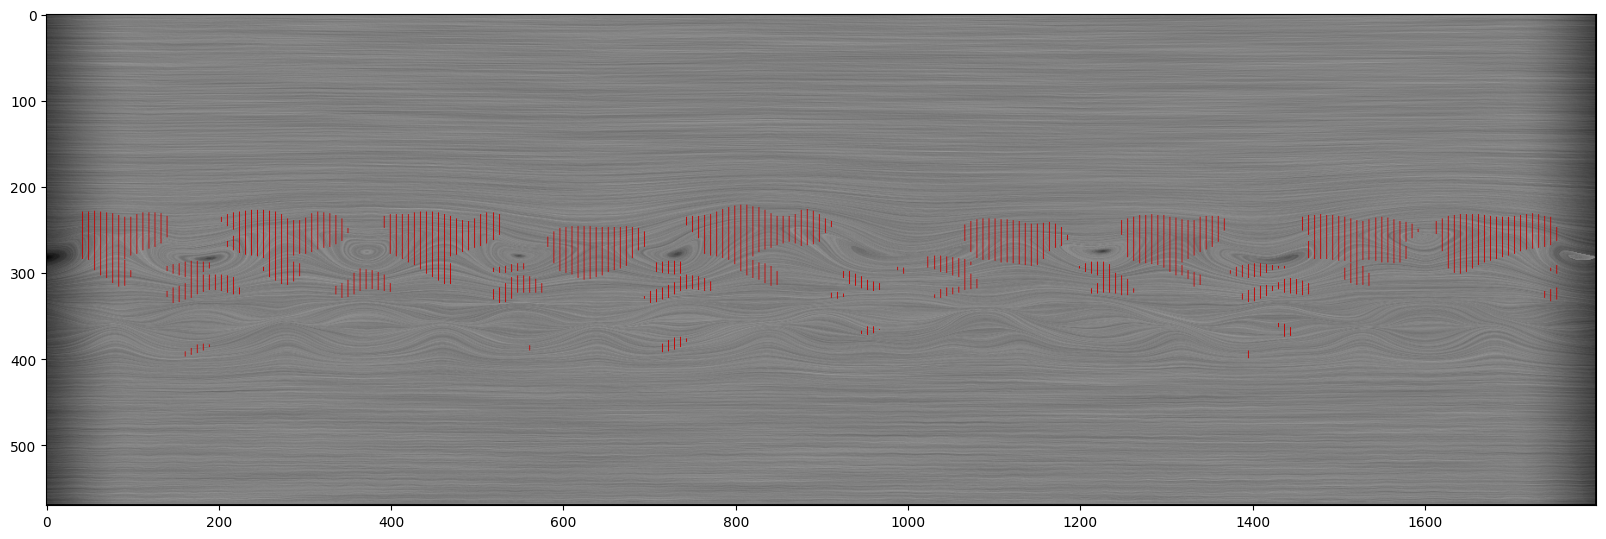

In [10]:
#rcnn的なことをして、licの画像にリコネクション点のびょうがをしたい。
import matplotlib.pyplot as plt
target = "density"#magxyはsnapをfusionnpyで作らないといけない
tag = "O"
methodname = "XGBoost"
para = 10
job = 10
dataset = 77
snap = mf.gen_snap_path(target, para, job, dataset)

#学習モデルをファイルに保存、読み込み例
import pickle
def loadmodel(modelsdir, target, tag, methodname):
    ###
    return model[0]
    ###
    path = picout + "model_" + target + "_" + tag + "_" + methodname
    with open(path, 'rb') as f:
        return pickle.load(f)[0]
# model = loadmodel(picout, target, tag, methodname)
# model = model[0]
model = svm
import cv2
def P(snappath, model):
    
    def bmplocx(npylocx):
        bmpXlen = 3598
        # npyXlen = 257
        npyXlen = 513
        return int(npylocx*bmpXlen/npyXlen)
    def bmplocy(npylocy):
        bmpYlen = 570
        npyYlen = 1025
        return int(bmpYlen-(bmpYlen*npylocy/npyYlen))
    xrange = int(10/2)
    yrange = int(100/2)
    def trimnpy(im, xcenter, ycenter):
        xup, xdown = (xcenter + xrange), (xcenter - xrange)
        yup, ydown = (ycenter + yrange), (ycenter - yrange)
        res = im[ydown:yup,xdown:xup]
        # print(im)
        res = np.array(((res - min(res.flat)) / max(res.flat)).flat)
        return res
    def drawOnBMP(licpath, locs):#########点の描画とかにするかも
        # xup, xdown = bmplocx(xcenter + xrange), bmplocx(xcenter - xrange)
        # yup, ydown = bmplocy(ycenter + yrange), bmplocy(ycenter - yrange)
        lic = cv2.imread(licpath)
        for loc in locs:
            x, y = bmplocx(loc[1]), bmplocy(loc[0])
            lic[bmplocy(loc[0]),bmplocx(loc[1])] = [200,0,0]
        return lic


        # return im[yup:ydown,xdown:xup]
    im = (mf.load(snappath))
    ys = range(51,im.shape[0]-51)
    # xs = range(6,im.shape[1]-6)
    xs = range(6,251)
    len_ysxs = len(xs)*len(ys)
    # separated = {"loc":[[0,0,0,0] for i in range(len_ysxs)], "im":[], "preds":[]}
    separated = {"loc":[], "im":[], "preds":[]}
    # i_count = 0
    for y in ys:
        for x in xs:
            separated["im"].append(trimnpy(im, x,y))
            separated["loc"].append((y,x))

            # separated["im"][i_count,:] = trimnpy(im,x,y)
            # i_count += 1
    separated["preds"] = model.predict(separated["im"])
    reconnectings = []
    for i in range(len(separated["im"])):
        if separated["preds"][i]:
            reconnectings.append(separated["loc"][i])
    licpath = f"../imgout/ohnolic/snap{dataset}/lic_snap{dataset}.{'{0:02d}'.format(int(para))}.{'{0:02d}'.format(int(job))}.bmp"
    return drawOnBMP(licpath, reconnectings)
    # cv2.imwrite(outname, separated_im)

lic = P(snap, model)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
plt.imshow(lic)
plt.show()

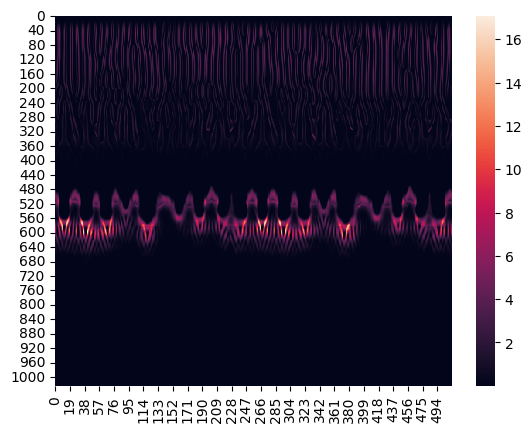

In [18]:
mf.show(mf.load(mf.gen_snap_path("enstrophy", para, job, dataset)))